In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [66]:
df = pd.read_csv("/home/magnus9102/Mostafa/Py/Github/data-science/mostafa_vahdani_bachelor_project/data/processed/flight_tickets_dataset.csv")

In [67]:
plt.figure(figsize=(12,8))

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<AxesSubplot:>

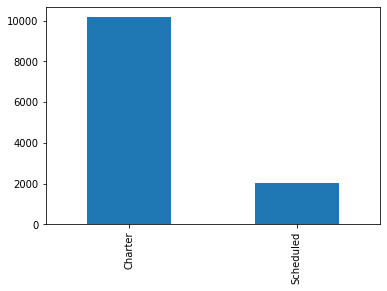

In [68]:
# df["flight_sale_type"].plot(kind='kde',color='blue')
df['flight_sale_type'].value_counts().plot(kind='bar')


In [69]:
def advance_mode(group):
    mode = group.mode()
    if not mode.empty:
        return group.fillna(group.mode().iloc[0])
    return group


result = df.groupby(["company_name", "fare_class_code"])['flight_sale_type'].apply(advance_mode)
# indexed_result = result.reset_index().set_index('level_2')
# dropped_result = indexed_result.drop(["company_name", "fare_class_code"], axis=1)
df['flight_sale_type'] = result


In [70]:
df['flight_sale_type'].value_counts()

Charter      10857
Scheduled     2656
Name: flight_sale_type, dtype: int64

<AxesSubplot:>

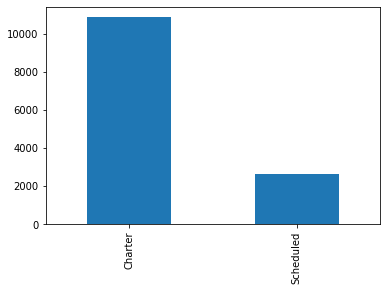

In [71]:
df['flight_sale_type'].value_counts().plot(kind='bar')

In [76]:
def fill_with_random(df, column):
    df2 = df.copy()
    df2[column] = df2[column].apply(lambda x: np.random.choice(
        df2[column].dropna().values) if pd.isnull(x) else x)
    return df2


df = fill_with_random(df, "flight_sale_type")


In [77]:
df['flight_sale_type'].value_counts()

Charter      11223
Scheduled     2748
Name: flight_sale_type, dtype: int64

<AxesSubplot:>

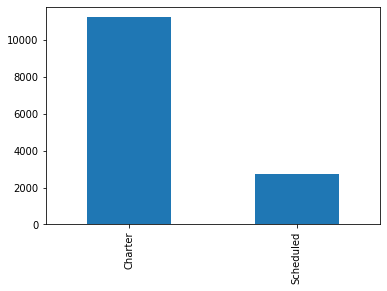

In [78]:
df['flight_sale_type'].value_counts().plot(kind='bar')